In [6]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy as sc
from iminuit import Minuit
from iminuit import cost
from scipy import stats

4


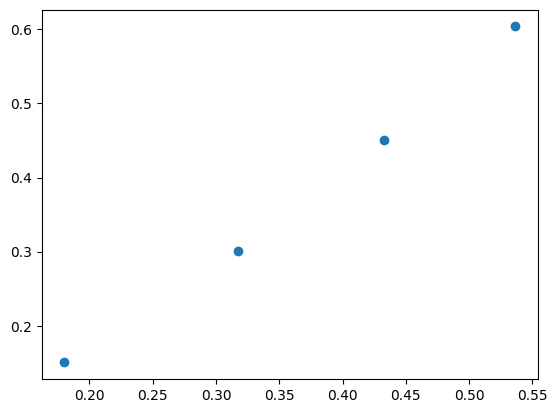

In [8]:
#importing the data

data = np.loadtxt('boi_weighted_means.csv', delimiter=',', skiprows=1)

data_times = data[0][14:]
data_timeserr = data[1][14:]

beginning = np.array([0.01])
data_distance = data[0][9:13] / 100
data_distanceerr = (data[1][9:13]) / 100



#data_distance = np.append(beginning, data_distances)
#data_distanceerr = np.append(beginning, data_distanceerrs)

#print(data_times)
#print(data_distanceerr)


Ndata = len(data_distance)
print(Ndata)

#quick plot()

plt.plot(data_times, data_distance,'o')

In [9]:
#defining our function

def f_dist(t, a, v0):
    return v0*t + a*(0.5)*(t**2)

Nparam = 2 #number of parameters 

In [10]:
#the chi2 fit function

a_fit = cost.LeastSquares(data_times, data_distance, data_distanceerr, f_dist)

In [11]:
mfit = Minuit(a_fit, a = 6, v0 = 0)
mfit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 10.89 (χ²/ndof = 5.4)      │              Nfcn = 43               │
│ EDM = 2.68e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.632   │   0.005   │            │            │         │         │       │
│ 1 │ v0   │  0.6887   │  0.0011   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │        a       v0 │
├────┼───────────────────┤
│  a │ 2.26e-05  -5.1e-6 │
│ v0 │  -5.1e-6  1.2e-06 │
└────┴───────────────────┘

In [12]:
#extracting the best fit values

for name in mfit.parameters :
    value, error = mfit.values[name], mfit.errors[name]
    print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

#chi2 value

chi2 = mfit.fval

#number of degrees of freedom 
#Ndof = Ndata - Nparam
#ndof = 2 - 1 = 1

Ndof = int(Ndata - Nparam)


p_value = stats.chi2.sf(chi2, Ndof)

print(f"Chi2 value: {chi2:.1f}   Ndof = {Ndof:.0f}    Prob(Chi2,Ndof) = {p_value:5.3f}")


Fit value: a = 1.63195 +/- 0.00475
Fit value: v0 = 0.68865 +/- 0.00109
Chi2 value: 10.9   Ndof = 2    Prob(Chi2,Ndof) = 0.004


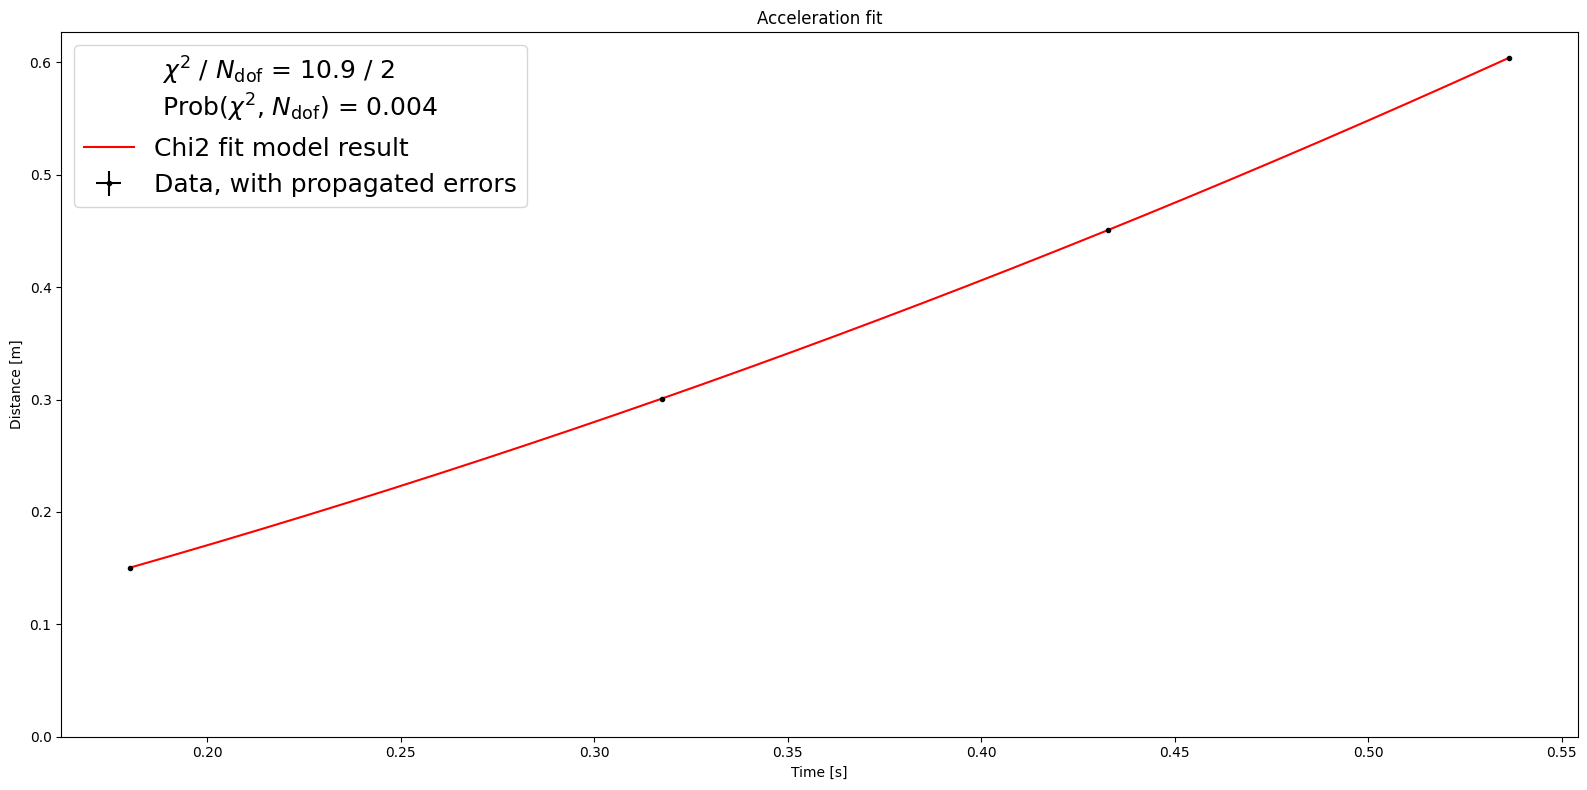

In [13]:
xmin = np.min(data_times)    
xmax = np.max(data_times)  

#drawing the fit

fig, ax = plt.subplots(figsize=(16, 8))
ax.errorbar(data_times, data_distance, yerr=data_distanceerr, xerr=0.0, label='Data, with propagated errors', fmt='.k')

ax.set(xlabel="Time [s]", # the label of the y axis
       ylabel="Distance [m]",  # the label of the y axis
       title="Acceleration fit", # the title of the plot
       ylim=[0.0,None]) # Setting the miminum to zero

# Adding fit function to plot:
x_axis = np.linspace(xmin, xmax, 1000)
ax.plot(x_axis, f_dist(x_axis, *mfit.values[:]), '-r', label= r"Chi2 fit model result") 

# Adding fit results to plot:
chi2 = mfit.fval                     # ChiSquare value
Ndof = Ndata - Nparam     # Number of (non-empty) bins
Prob = stats.chi2.sf(chi2, Ndof)     # ChiSquare probability given Ndof

fit_info = [f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {chi2:.1f} / {Ndof}", f"Prob($\\chi^2$, $N_\\mathrm{{dof}}$) = {Prob:.3f}",]
for p, v, e in zip(mfit.parameters, mfit.values[:], mfit.errors[:]) :
    Ndecimals = max(0,-np.int32(np.log10(e)-1-np.log10(2)))                                # Number of significant digits
    

plt.legend(title="\n".join(fit_info), fontsize=18, title_fontsize = 18, alignment = 'center');
fig.tight_layout()